<a href="https://www.kaggle.com/code/hudsonwinslow/finding-heavy-traffic-indicators-on-i-94?scriptVersionId=137162110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Finding Heavy Traffic Indicators on I-94

## Overview 

**Data:** Dataset of westbound traffic on the I-94 Interstate highway. 

**Goal:**
The goal of our analysis is to identify indicators of heavy traffic on I-94. These indicators can be weather type, time of day, time of week, etc. For example, we may find that traffic is usually heavier in the summer or when it snows.

**Steps:**
1. Overview
2. Import libraries and data 
3. Basic data exploration 
4. Clean data 
5. In-depth data exploration 
6. Summary and conclusion 

--- 

## Import Libraries & Data 

In [1]:
# Import Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data viz
%matplotlib inline
import seaborn as sns # 2+ variable data viz

# Read data into pandas DataFrame (alter encoding if needed)
traffic = pd.read_csv('/kaggle/input/metro-interstate-traffic-volume/Metro_Interstate_Traffic_Volume.csv')

---
## Basic Data Exploration 

After importing our data and libraries, it helps to create an overview of our data. By doing this, we can better understand the data we are working with and spot potential gaps.

In [2]:
# Inspect data types in the DataFrame and confirm data has been read in as a pandas DataFrame 
print("Traffic DataFrame data types: \n")
print(traffic.info())

# Inspect initial 5 rows of DataFrame 
print("\n \n \n Traffic DataFrame initial 5 rows of data: \n")
print(traffic.head())

# Inspect last 5 rows of DataFrame 
print("\n \n \n Traffic DataFrame last 5 rows of data: \n")
print(traffic.tail())

# Summary statistics for numeric columns (default: only numeric included)
print("\n \n \n Numeric columns summary statistics: \n")
print(traffic.describe())

# Summary statistics for object columns 
print("\n \n \n Object columns summary statistics: \n")
print(traffic.describe(include=[object]))

Traffic DataFrame data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None

 
 
 Traffic DataFrame initial 5 rows of data: 

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2

<div class="alert alert-block alert-warning"> 

**Findings:** 
- 9 columns and 48204 rows (header row included)
    - 5 numeric columns (float64 (3) & int64 (2))
    - 4 object columns 
- No missing data in any column/row 
- Temperature conversion makes sense given "temp" column is currently listed in Kelvin


---

## Clean Data 

Convert temp column from Kelvin to Fahrenheit and remove outliers

In [3]:
# Convert Kelvin to Fahrenheit 
traffic["temp"] = 1.8*(traffic["temp"]-273) + 32
true_results = traffic["temp"] > -50
columns = ["temp", "traffic_volume"]
true_results_v2 = traffic.loc[true_results, columns]

--- 

## In-depth Data Exploration 

1. Comapre daytime with nighttime data 
2. Time indicators: hour, day of week, and month 
3. Weather indicators: temperature, rain, snow, cloud, etc. 


### Comapre daytime with nighttime data 
- Divide dataset into two parts: 
    - Daytime data: 7 a.m. - 7 p.m. 
    - Nighttime data: 7 p.m. - 7 a.m. 

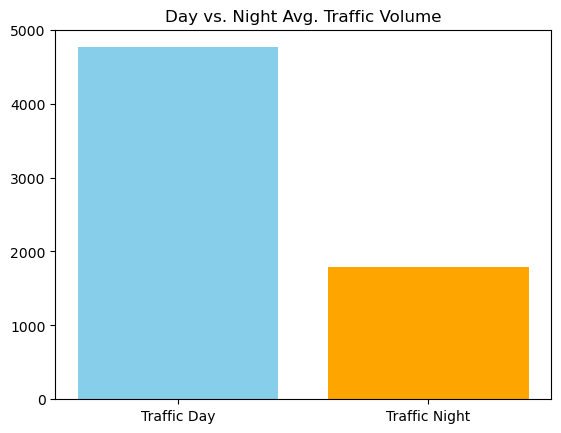

<Figure size 1000x1000 with 0 Axes>

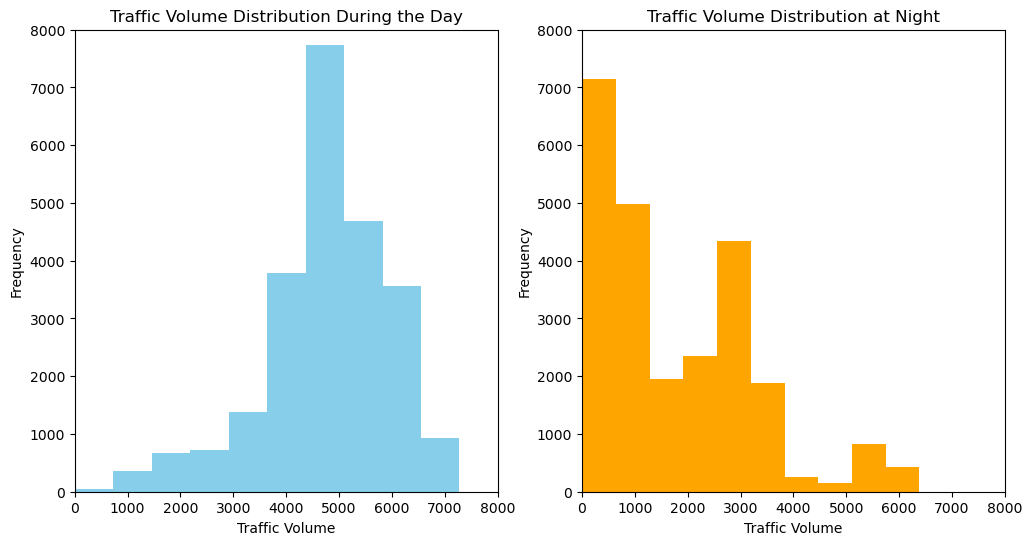

In [4]:
# Transform date_time column to datetime by using the function pd.to_datetime() 
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# Use the Series.dt.hour proprerty to get the hour of every instance of the date_time column 
traffic_day = traffic[(traffic['date_time'].dt.hour > 6) & (traffic['date_time'].dt.hour < 19)]
traffic_night = traffic[(traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour > 18)]

# Compare day and night (simple)
plt.figure()
plt.title("Day vs. Night Avg. Traffic Volume")
plt.bar("Traffic Day", traffic_day["traffic_volume"].mean(), color = "skyblue")
plt.bar("Traffic Night", traffic_night["traffic_volume"].mean(), color = "orange")
plt.figure(figsize = (10,10))
plt.show()

# Compare day and night (advanced)
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.hist(traffic_day['traffic_volume'], color = "skyblue")
plt.title('Traffic Volume Distribution During the Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,8000)

plt.subplot(1,2,2)
plt.hist(traffic_night['traffic_volume'], color = "orange")
plt.title('Traffic Volume Distribution at Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,8000)
plt.show()

<div class="alert alert-block alert-warning"> 

**Findings:** 
- The average traffic volume during the day is noticeably higher than the average traffic volume during at night: ~4.5k during day vs. ~2k at night. 
- The distribution of traffic volume during the day is concentrated between 3.5k and 6.5k. The distribution of traffic volume at night is concentrated between 0 and 3k. 

### Time indicators: hour, day of week, and month 
- Day: Series.dt.hour
- Day of week: Series.dt.dayofweek
- Month: Series.dt.month

<Figure size 640x480 with 0 Axes>

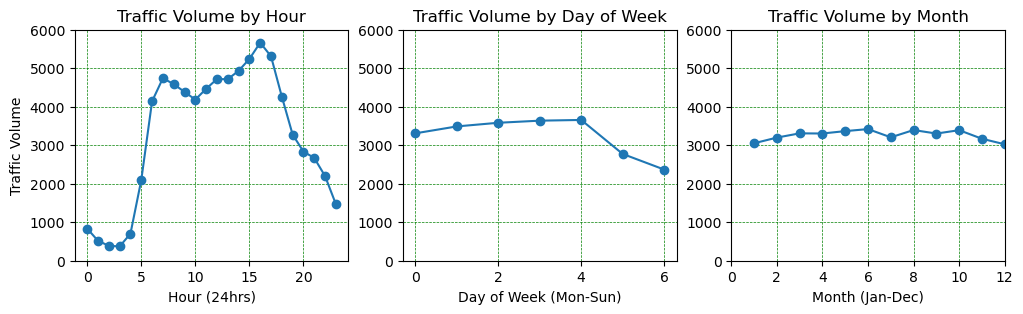

In [5]:
# Create a grid chart 
plt.figure()
plt.figure(figsize = (12,3))

# Hourly subplot
plt.subplot(1,3,1)
traffic["hour"] = traffic["date_time"].dt.hour
hourly_volume = traffic.groupby("hour").mean()
hourly_volume["traffic_volume"].plot.line(marker ='o')
plt.title("Traffic Volume by Hour")
plt.xlabel("Hour (24hrs)")
plt.ylabel("Traffic Volume")
plt.ylim(0,6000)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

# Day of Week subplot
plt.subplot(1,3,2)
traffic["dow"] = traffic["date_time"].dt.dayofweek
dow_volume = traffic.groupby("dow").mean()
dow_volume["traffic_volume"].plot.line(marker ='o')
plt.title("Traffic Volume by Day of Week")
plt.xlabel("Day of Week (Mon-Sun)")
plt.ylim(0,6000)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

# Month subplot
plt.subplot(1,3,3)
traffic["month"] = traffic["date_time"].dt.month
month_volume = traffic.groupby("month").mean()
month_volume["traffic_volume"].plot.line(marker ='o')
plt.title("Traffic Volume by Month")
plt.xlabel("Month (Jan-Dec)")
plt.xlim(0,12)
plt.ylim(0,6000)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()

<div class="alert alert-block alert-warning"> 

**Findings:** 
- Traffic is heaviest between 6 a.m. and 6 p.m. (average traffic volume above 4k) 
- Peak traffic volume is around 4 p.m. 
- Traffic is heaviest between Monday and Friday (average traffic volume above 3k)
- Traffic drops on Saturday and Sunday (average traffic volume below 3k) 
- Traffic does not appear to vary significantly across months

### Weather Indicators
1. Temperature (temp) 
2. Rain (rain_1h)
3. Snow (snow_1h) 
4. Clouds (clouds_all) 
5. Weather (weather_main & weather_description) 

Find the correlation between each column and traffic volume. Visualize the most relevant correlations in a scatter plot. 

In [6]:
# Temperature 
print("Temperature & Traffic Volume Correlation:")
print(traffic["temp"].corr(traffic["traffic_volume"]))

# Rain
print("\n \n Rain & Traffic Volume Correlation:")
print(traffic["rain_1h"].corr(traffic["traffic_volume"]))

# Snow
print("\n \n Snow & Traffic Volume Correlation:")
print(traffic["snow_1h"].corr(traffic["traffic_volume"]))

# Clouds
print("\n \n Clouds & Traffic Volume Correlation:")
print(traffic["clouds_all"].corr(traffic["traffic_volume"])) 

# Weather
# print("\n \n Weather (Main) & Traffic Volume Correlation:")
# print(traffic["weather_main"].astype('category').cat.codes.corr(traffic["traffic_volume"])) 

# print("\n \n Weather (Description) & Traffic Volume Correlation:")
# print(traffic["weather_description"].astype('category').cat.codes.corr(traffic["traffic_volume"])) 


Temperature & Traffic Volume Correlation:
0.13029879817112658

 
 Rain & Traffic Volume Correlation:
0.00471370236785923

 
 Snow & Traffic Volume Correlation:
0.0007334345358283799

 
 Clouds & Traffic Volume Correlation:
0.06705377704283502


Text(0, 0.5, 'Traffic Volume')

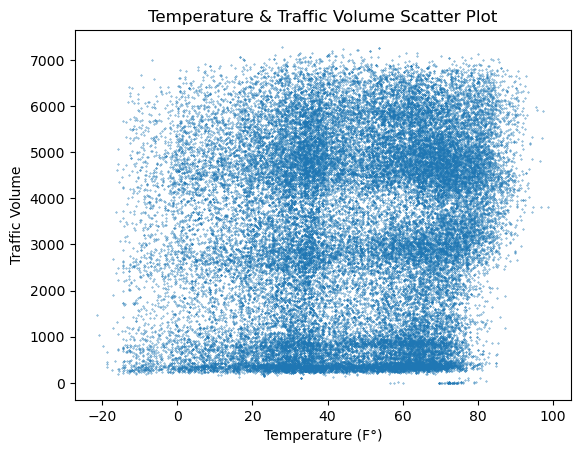

In [7]:
# Temperature and Traffic Volume scatter plot
plt.scatter(true_results_v2["temp"], true_results_v2["traffic_volume"], s = 0.1)
plt.title("Temperature & Traffic Volume Scatter Plot")
plt.xlabel("Temperature (F°)")
plt.ylabel("Traffic Volume")

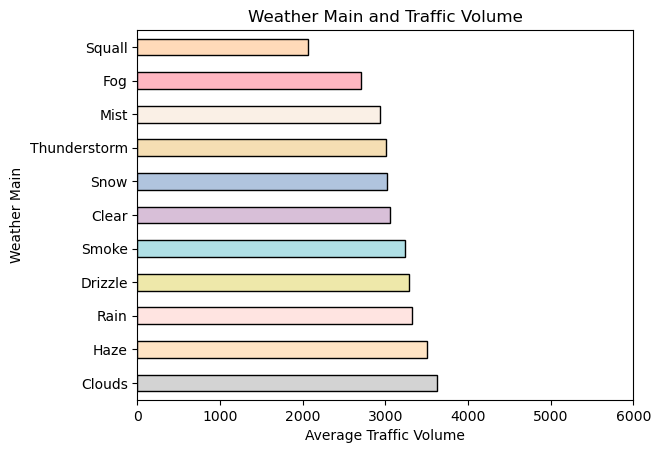

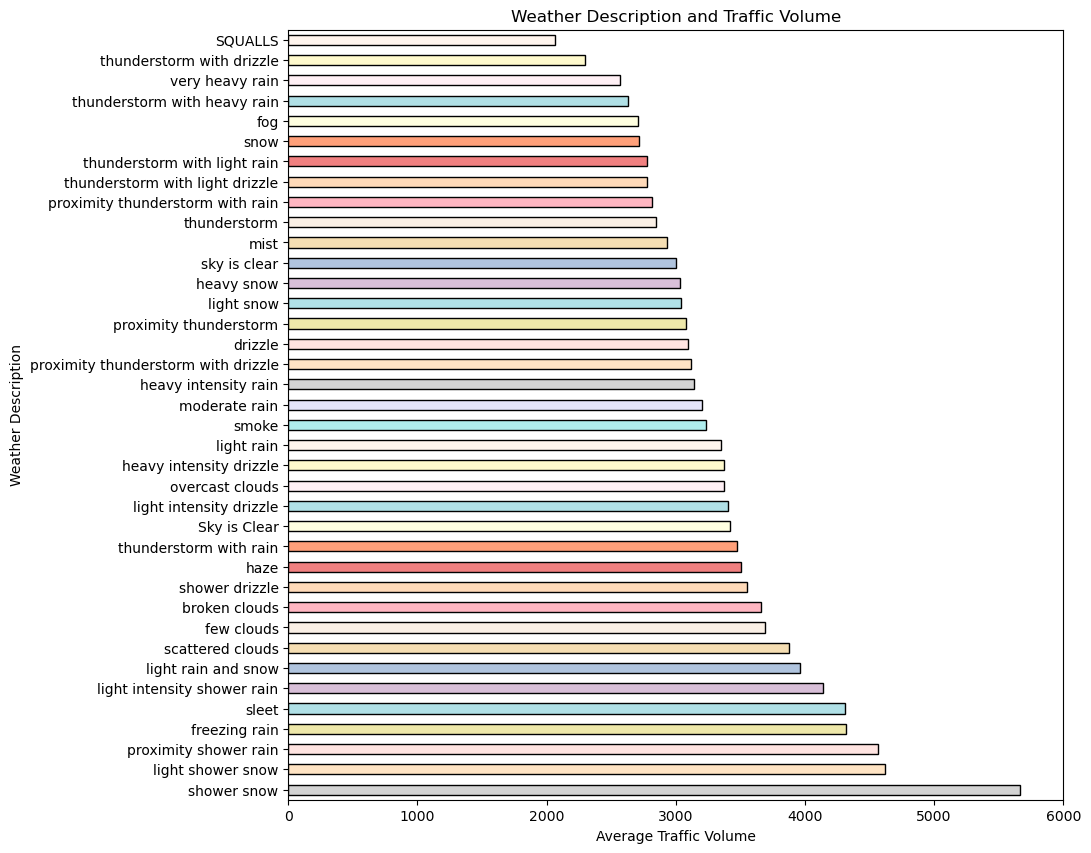

In [8]:
# Weather Main and Traffic Volume bar plot 
weather_main_volume = traffic.groupby("weather_main").mean().sort_values("traffic_volume", ascending = False)
weather_main_volume["traffic_volume"].plot.barh(color = ['lightgray', 'bisque', 'mistyrose', 'palegoldenrod', 'powderblue', 
    'thistle', 'lightsteelblue', 'wheat', 'linen', 'lightpink', 
    'peachpuff'], edgecolor = "black")
plt.title("Weather Main and Traffic Volume")
plt.xlabel("Average Traffic Volume")
plt.ylabel("Weather Main")
plt.xlim(0,6000)
plt.show()

# Weather Description and Traffic Volume bar plot 
plt.figure(figsize = (10,10))
weather_desc_volume = traffic.groupby("weather_description").mean().sort_values("traffic_volume", ascending = False)
weather_desc_volume["traffic_volume"].plot.barh(color = ['lightgray', 'bisque', 'mistyrose', 'palegoldenrod', 'powderblue', 
    'thistle', 'lightsteelblue', 'wheat', 'linen', 'lightpink', 
    'peachpuff', 'lightcoral', 'lightsalmon', 'lightyellow', 'powderblue',
    'lavenderblush', 'lemonchiffon', 'seashell', 'paleturquoise', 'lavender'], edgecolor = "black")
plt.title("Weather Description and Traffic Volume")
plt.xlabel("Average Traffic Volume")
plt.ylabel("Weather Description")
plt.xlim(0,6000)
plt.show()